In [6]:
# %pip install calplot

In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
import calplot

# import data

In [8]:
fln = 'surfweer_data_2021_01_26_clean.csv'

In [9]:
df = pd.read_csv(fln, index_col=0, parse_dates=['report_date', 'post_date'],dtype={'wetsuit':'str'})
df['week'] = df["report_date"].apply(lambda x: x.isocalendar()[1])
df['weekday'] = df["report_date"].apply(lambda x: x.weekday())

In [10]:
df_sub = df[df['year']==2019.0]

# calendar heatmap

In [11]:
from matplotlib import colors
import matplotlib.pyplot as plt


In [12]:
calendar = np.nan * np.zeros((8, 54))

week, weekday = zip(*[date.isocalendar()[1:] for date in df_sub["report_date"]])
calendar[weekday, week] = 1

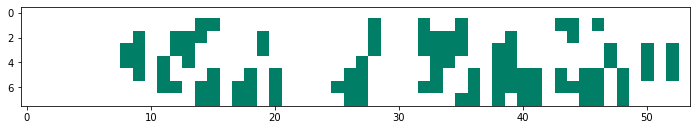

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(calendar, cmap='summer')

In [14]:
df['test'] = 1  
df_sub = df[['report_date', 'test']]
df_sub = df_sub.drop_duplicates()

In [15]:
events = pd.Series(df_sub['test'].to_numpy(), index=df_sub['report_date'])

In [16]:
import matplotlib.colors

# Color for False and True
cmap = matplotlib.colors.ListedColormap(['xkcd:ocean blue', 'green'])

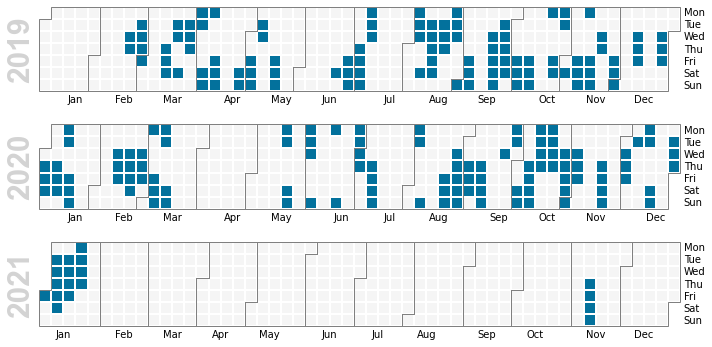

In [17]:
calplot.calplot(events, cmap = cmap );

# monthly report

In [18]:
df_monthly = df.groupby(['year', 'month'])['report_date'].count()

In [19]:
df_monthly = df_monthly.reset_index()

In [21]:
import seaborn as sns


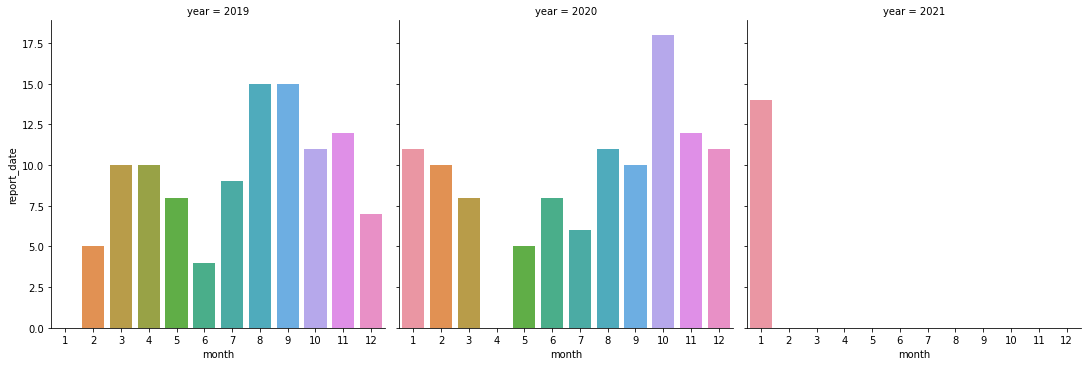

In [22]:
sns.catplot( x = 'month', y = 'report_date', col= 'year', data= df_monthly, kind='bar')

In [23]:
df_monthly['test'] = 1

In [24]:
# sns.heatmap(df_monthly)

# deal with wetsuit

In [25]:
print('the reports suggest {:} types of wetsuit, in various thickness'.format(len(df['wetsuit'].unique())))

the reports suggest 13 types of wetsuit, in various thickness


## Remap the wetsuit thickness
As per [srface](https://srface.com/knowledge-base/neoprene-wetsuit-thickness/), *brands usually advertise their wetsuit neoprene thicknesses as 3/2, 4/3, 5/4, 6/4, etc. 3/2 for instance, means this wetsuit’s main panels are 3mm and 2mm thick. Normally, the chest and back panels are made out of thicker neoprene foam for extra warmth. Arms, shoulders, and legs are usually thinner for more flexibility.* 

I chose to use the main panel thickness only in the analysis, to reduce the number of types. It will be renamed using 3, 4, 5, 6. 

In [26]:
def rename_wetsuit(wet_suit): 
    """
    Rename wetsuit, use only the main panel thickenss (the first character in the string)
    """
    try: 
        return wet_suit[0]
    except:
        pass

In [27]:
df['wetsuit'] = df['wetsuit'].apply(rename_wetsuit)

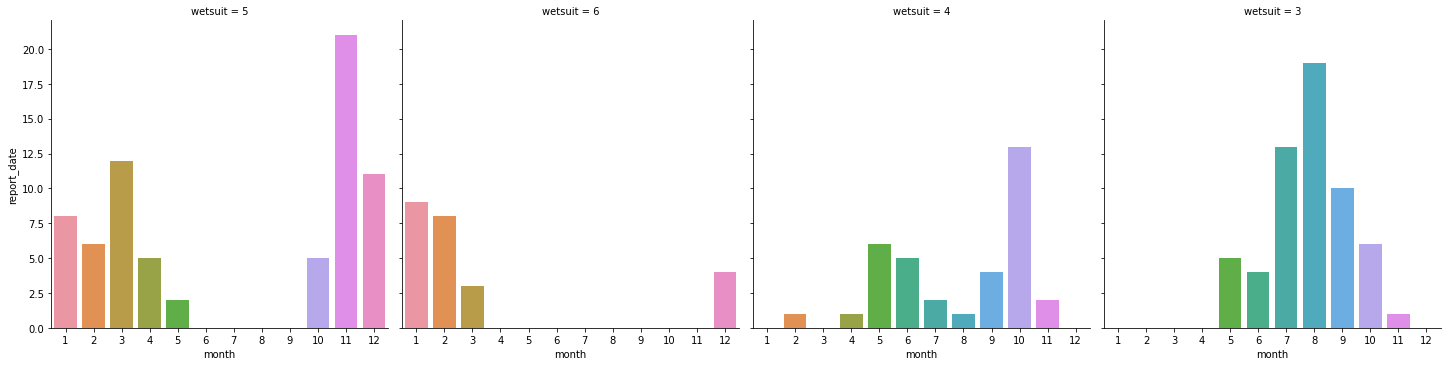

In [28]:
df_monthly = df.groupby(['month','wetsuit'])['report_date'].count()
df_monthly = df_monthly.reset_index()

sns.catplot( x = 'month', y = 'report_date', col = 'wetsuit',data= df_monthly, kind='bar')

<AxesSubplot:xlabel='month', ylabel='Count'>

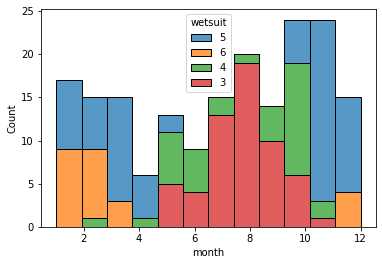

In [42]:
sns.histplot( x = 'month', weights = 'report_date', hue = 'wetsuit',
             data= df_monthly, multiple='stack', bins = 12)

In [38]:
sns.displot??